In [2]:
import os
import tarfile
import urllib

In [14]:
root = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
url = "datasets/housing/housing.tgz"
HOUSING_URL = root + url
HOUSING_PATH = os.path.join("datasets", "housing")

In [19]:
def fetch_housing_data(housing_url, housing_path):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    file_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, file_path)
    housing_tgz = tarfile.open(file_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [20]:
fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH)

In [21]:
import pandas as pd

In [22]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [24]:
housing = load_housing_data()

In [25]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [26]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [27]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [28]:
%matplotlib inline

In [29]:
import matplotlib.pyplot as plt

In [31]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000196191A3E48>,
      dtype=object)

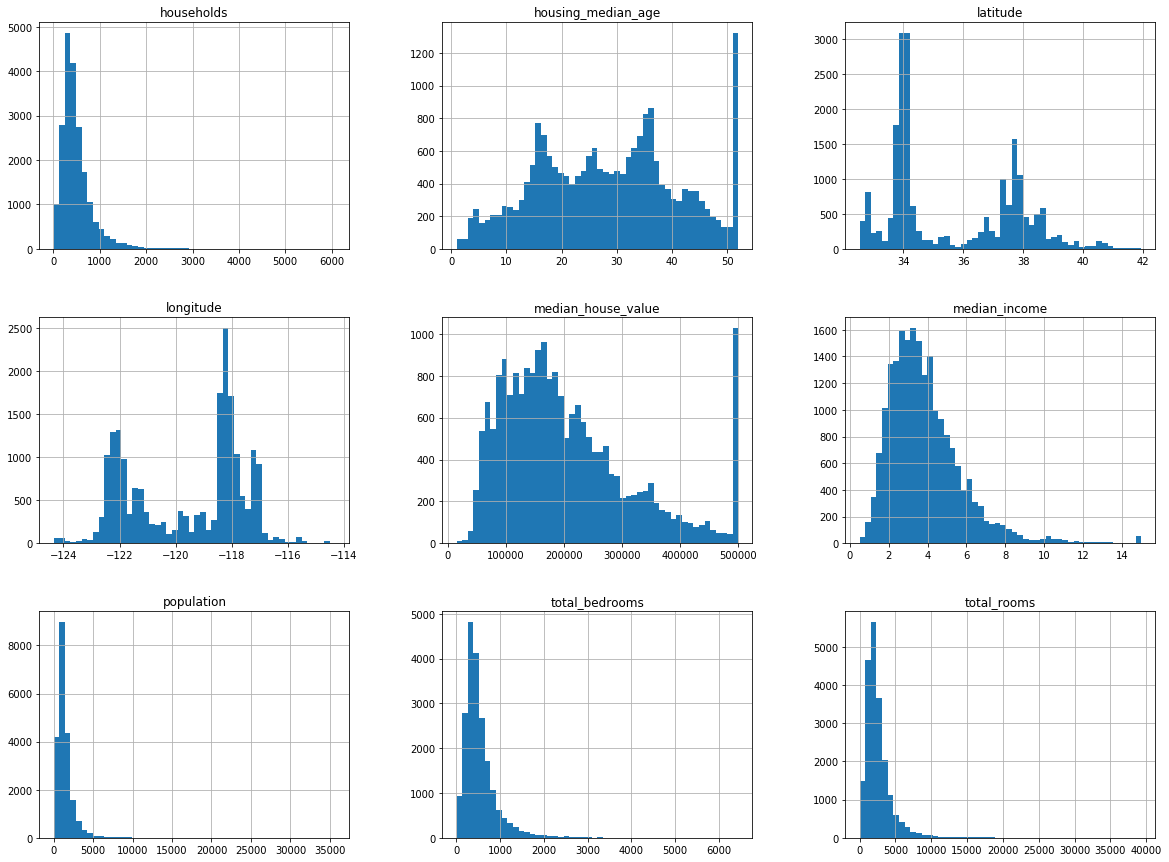

In [30]:
housing.hist(bins = 50, figsize = (20,15))

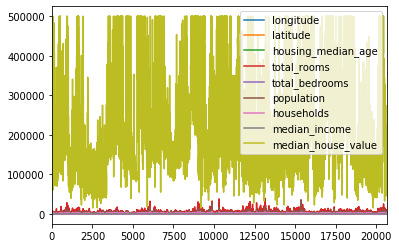

In [34]:
housing.plot.line() # Does not make any sense

# Create a Test Set

In [36]:
import numpy as np

In [38]:
np.random.permutation(len(housing))

array([4, 3, 0, 7, 9, 6, 8, 1, 5, 2])

In [50]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [51]:
train_set, test_set = split_train_test(housing, 0.2)

In [56]:
print("train: {}, test: {}".format(len(train_set), len(test_set)))

train: 16512, test: 4128


In [58]:
# Use sklearn to seperate
from sklearn.model_selection import train_test_split

In [60]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
# pure ramdom sampling may bring significant sampling bias.

In [77]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5)

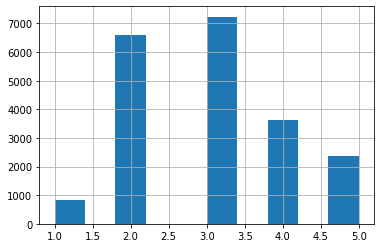

In [78]:
housing['income_cat'].where(housing['income_cat'] < 5,5.0, inplace = False).hist()

In [79]:
from sklearn.model_selection import StratifiedShuffleSplit

In [81]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

In [93]:
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [94]:
# "_" is used for throwaway variables, it is just a name
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [95]:
# Data Visualization
housing = strat_train_set.copy()

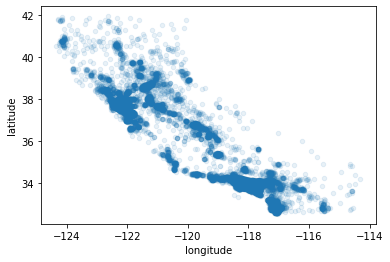

In [99]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)

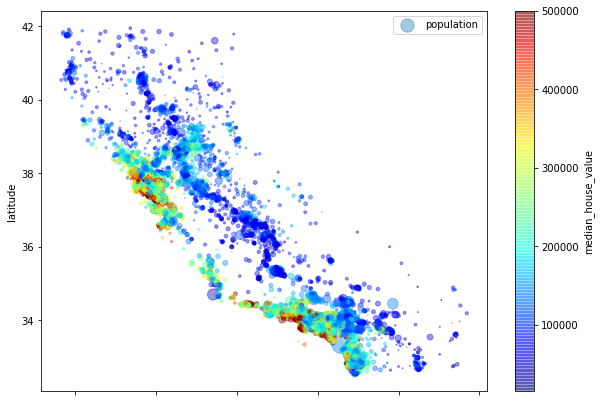

In [101]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4,
            s = housing['population']/100, label = 'population', figsize = (10,7),
            c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True)

In [102]:
# Get the correlation
corr_matrix = housing.corr()

In [103]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924515,-0.109796,0.048963,0.075583,0.107149,0.061549,-0.015589,-0.045056
latitude,-0.924515,1.000000,0.009864,-0.039721,-0.071816,-0.115095,-0.076752,-0.078979,-0.144684
housing_median_age,-0.109796,0.009864,1.000000,-0.363195,-0.324448,-0.297841,-0.305708,-0.116608,0.111770
total_rooms,0.048963,-0.039721,-0.363195,1.000000,0.928874,0.855803,0.917204,0.203718,0.135989
total_bedrooms,0.075583,-0.071816,-0.324448,0.928874,1.000000,0.876225,0.979599,-0.005800,0.049177
population,0.107149,-0.115095,-0.297841,0.855803,0.876225,1.000000,0.905172,0.007472,-0.024765
households,0.061549,-0.076752,-0.305708,0.917204,0.979599,0.905172,1.000000,0.014929,0.065841
median_income,-0.015589,-0.078979,-0.116608,0.203718,-0.005800,0.007472,0.014929,1.000000,0.687474
median_house_value,-0.045056,-0.144684,0.111770,0.135989,0.049177,-0.024765,0.065841,0.687474,1.000000


In [106]:
from pandas.plotting import scatter_matrix

In [107]:
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001961FC62780>,
      dtype=object)

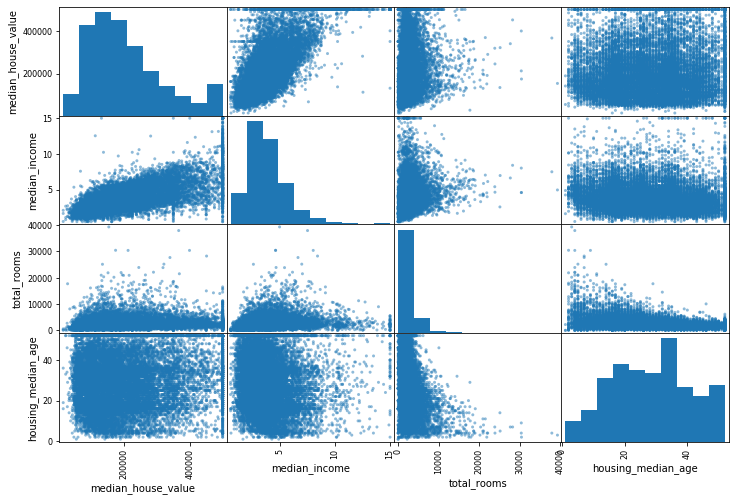

In [108]:
scatter_matrix(housing[attributes], figsize = (12,8))

In [109]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [111]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
15698,-122.46,37.79,52.0,899.0,96.0,304.0,110.0,14.2959,NEAR BAY
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [112]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

# Data Cleaning

In [152]:
from sklearn.preprocessing import Imputer

In [118]:
# Use Imputer to drop the missing values
imputer = Imputer(strategy = 'median')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [120]:
housing_num = housing.drop('ocean_proximity', axis = 1)

In [121]:
# Calculate median and store them in imputer.strategy
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [122]:
# fill missing values with median 
X = imputer.transform(housing_num)

In [124]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer

In [125]:
encoder1 = LabelEncoder()
encoder2 =  OneHotEncoder()
encoder3 = LabelBinarizer()

In [126]:
housing_cat = housing['ocean_proximity']

In [127]:
housing_cat_encoded1 = encoder1.fit_transform(housing_cat)

In [129]:
housing_cat_1hot = encoder2.fit_transform(housing_cat_encoded1.reshape(-1,1))

In [130]:
housing_cat_bi = encoder3.fit_transform(housing_cat)

# Custom Transformers

In [211]:
from sklearn.base import BaseEstimator, TransformerMixin

In [212]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

In [213]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [214]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [215]:
# Pipeline

In [216]:
from sklearn.pipeline import Pipeline

In [217]:
from sklearn.preprocessing import StandardScaler

In [218]:
from sklearn.impute import SimpleImputer

In [235]:
num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [236]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [240]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('label_binarizer', LabelBinarizer()),
    ])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [241]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy = "median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [247]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,0.223852,2.094395
15698,-122.46,37.79,52.0,899.0,96.0,304.0,110.0,14.2959,NEAR BAY,8.172727,0.106785,2.763636
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.505810,0.231341,3.047847


In [249]:
# housing[cat_attribs]

In [251]:
encoder = LabelBinarizer()
encoder.fit_transform(housing_cat)

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [263]:
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', LabelBinarizer()),
])
cat_pipeline.fit_transform(housing)

TypeError: fit_transform() takes 2 positional arguments but 3 were given

In [243]:
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
("num_pipeline", num_pipeline),
("cat_pipeline", cat_pipeline),
])

In [244]:
housing_prepared = full_pipeline.fit_transform(housing)

TypeError: fit_transform() takes 2 positional arguments but 3 were given

In [229]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [230]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
('imputer', Imputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [231]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [232]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
('selector', DataFrameSelector(num_attribs)),
('imputer', Imputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),
])
cat_pipeline = Pipeline([
('selector', DataFrameSelector(cat_attribs)),
('label_binarizer', LabelBinarizer()),
])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [233]:
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
("num_pipeline", num_pipeline),
("cat_pipeline", cat_pipeline),
])

In [234]:
housing_prepared = full_pipeline.fit_transform(housing)

TypeError: fit_transform() takes 2 positional arguments but 3 were given